In [1]:
from keras.models import Model
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
def autoencode(model):
    
    decoded_imgs = model.predict(x_test)
    
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    compressed = get_3rd_layer_output([x_test])
    
    return compressed

def test_restoration(model):
    
    decoded_imgs = model.predict(x_test)
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    
    for i in range(2):
        
        print("original: ")
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        plt.show()
        
        #-------------------
        
        print("reconstructed: ")
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        plt.show()
        
        #-------------------
        
        print("compressed: ")
        current_compressed = get_3rd_layer_output([x_test[i:i+1]])[0][0]
        plt.imshow(current_compressed.reshape(8, 4))
        plt.gray()
        plt.show()
        #print(current_compressed)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

instances, input_features = x_train.shape

In [5]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(input_features, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 198us/step - loss: 0.1391 - val_loss: 0.1027
Epoch 2/3
60000/60000 [==============================] - 11s 177us/step - loss: 0.0992 - val_loss: 0.0946
Epoch 3/3
60000/60000 [==============================] - 11s 182us/step - loss: 0.0940 - val_loss: 0.0908


In [ ]:
#model.summary()

In [ ]:
layers = len(model.layers)

for i in range(layers):
    inp, out = model.layers[i].output.get_shape()
    print(i,". ",model.layers[i].output," (",out,")")

In [ ]:
weights = model.get_weights()

for i in range(len(weights)):
    print(i, ". ", len(weights[i]))

original: 


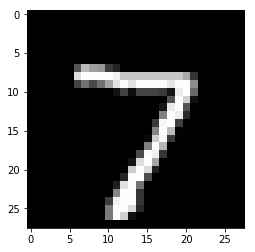

reconstructed: 


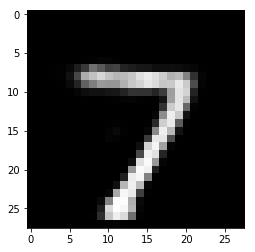

compressed: 


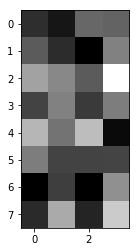

original: 


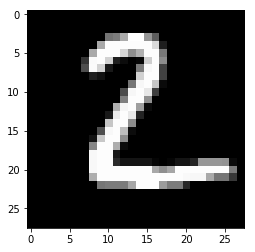

reconstructed: 


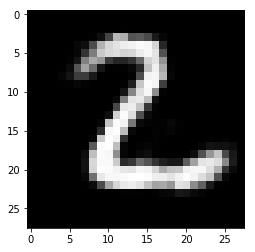

compressed: 


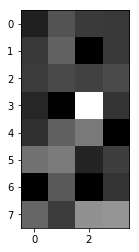

In [9]:
com = autoencode(model)

test_restoration(model)

In [10]:
decoder = Sequential()
decoder.add(Dense(128, activation='relu', input_shape=(32,)))
decoder.add(Dense(input_features, activation='sigmoid'))
#decoder.summary()

In [11]:
decoder_weights = decoder.get_weights()

for i in range(len(decoder_weights)):
    print(len(decoder_weights[i]))

32
128
128
784


In [12]:
weights = model.get_weights()

temp_weights = []

for i in range(4, 8):
    temp_weights.append(weights[i])

for i in range(len(temp_weights)):
    print(len(temp_weights[i]))

decoder.set_weights(temp_weights)

32
128
128
784


In [13]:
#copy these matrix from the compressed representation value
sample = np.array([2.59521651,5.63147545,2.05743384,4.32667685,6.58895254,0.0,3.75777841,15.93504238,8.22563648,10.76218987,9.22686291,7.61534977,8.59453583,7.27693939,0.0,0.0,6.01428413,5.45331526,4.60282326,5.23728228,6.86480665,13.43490028,5.81025648,10.99352455,10.77216816,2.27521825,5.83731318,7.09324121,3.53731441,6.28301096,4.87098885,3.07779741])
print(sample.shape)

(32,)


In [15]:
"""restored = decoder.predict(sample.reshape(1,32))

plt.imshow(restored.reshape(28, 28))
plt.show()"""

'restored = decoder.predict(sample.reshape(1,32))\n\nplt.imshow(restored.reshape(28, 28))\nplt.show()'

In [ ]:
print(len(com[0]),"x",len(com[0][0]))

In [16]:
from tensorflow.contrib.factorization.python.ops import clustering_ops
import tensorflow as tf

In [17]:
unsupervised_model = tf.contrib.learn.KMeansClustering(
    10
    , distance_metric = clustering_ops.SQUARED_EUCLIDEAN_DISTANCE #SQUARED_EUCLIDEAN_DISTANCE, COSINE_DISTANCE
    , initial_clusters=tf.contrib.learn.KMeansClustering.RANDOM_INIT
)

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_task_type': None, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\IS96273\\AppData\\Local\\Temp\\tmp9vanqhq3', '_evaluation_master': '', '_environment': 'local', '_is_chief': True, '_keep_checkpoint_max': 5, '_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_session_config': None, '_tf_random_seed': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C3ED75C518>, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0}


In [18]:
def train_input_fn():
    data = tf.constant(com[0], tf.float32)
    return (data, None)

In [19]:
unsupervised_model.fit(input_fn=train_input_fn, steps=5000)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\IS96273\AppData\Local\Temp\tmp9vanqhq3\model.ckpt.
INFO:tensorflow:loss = 3.95821e+06, step = 1
INFO:tensorflow:global_step/sec: 273.06
INFO:tensorflow:loss = 2.47405e+06, step = 101 (0.368 sec)
INFO:tensorflow:global_step/sec: 398.05
INFO:tensorflow:loss = 2.46812e+06, step = 201 (0.252 sec)
INFO:tensorflow:global_step/sec: 396.79
INFO:tensorflow:loss = 2.46546e+06, step = 301 (0.251 sec)
INFO:tensorflow:global_step/sec: 396.091
INFO:tensorflow:loss = 2.46387e+06, step = 401 (0.252 sec)
INFO:tensorflow:global_step/sec: 388.441
INFO:tensorflow:loss = 2.4628e+06, step = 501 (0.258 sec)
INFO:tensorflow:global_step/sec: 397.771
INFO:tensorflow:loss = 2.46196e+06, step = 601 (0.250 sec)
INFO:tensorflow:

KMeansClustering(params={'mini_batch_steps_per_iteration': 1, 'training_initial_clusters': 'random', 'distance_metric': 'squared_euclidean', 'use_mini_batch': True, 'relative_tolerance': None, 'kmeans_plus_plus_num_retries': 2, 'num_clusters': 10, 'random_seed': 0})

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\IS96273\AppData\Local\Temp\tmp9vanqhq3\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
following samples are clustered in same cluster:


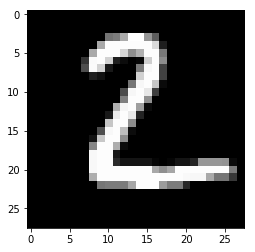

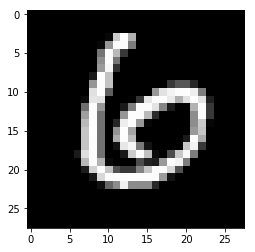

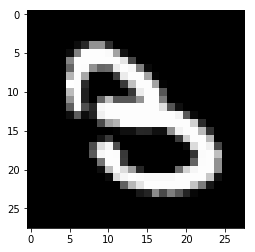

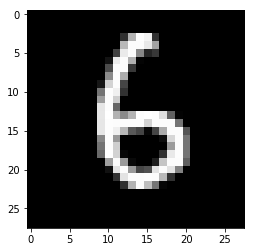

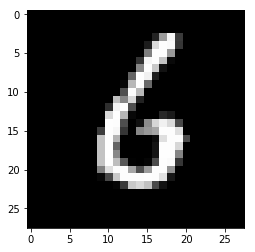

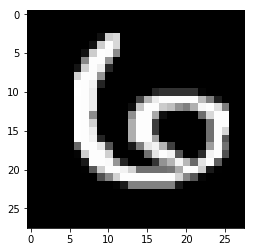

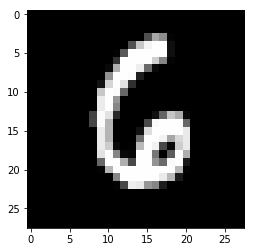

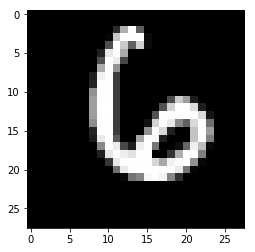

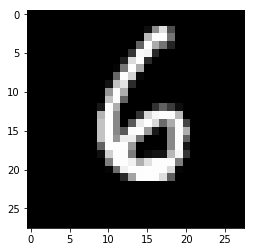

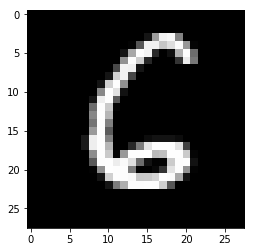

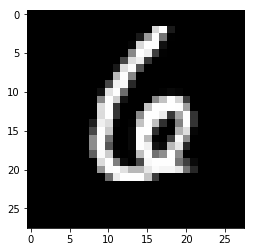

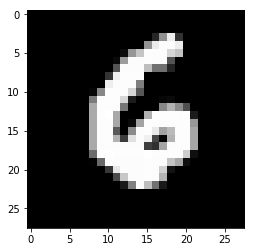

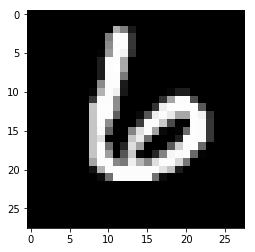

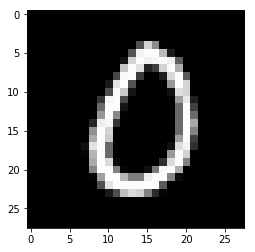

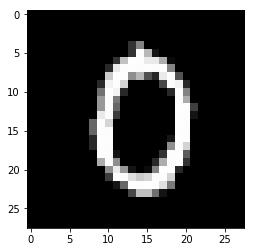

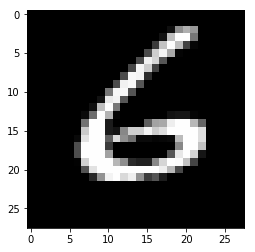

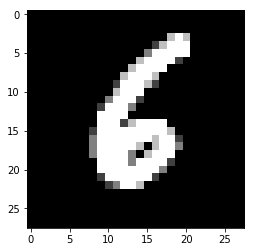

In [20]:
clusters = unsupervised_model.predict(input_fn=train_input_fn)

print("following samples are clustered in same cluster:")

index = 0
for i in clusters:
    
    current_cluster = i['cluster_idx']
    features = x_test[index]
    
    if index < 200 and current_cluster == 4:
        plt.imshow(x_test[index].reshape(28, 28))
        plt.gray()
        plt.show()
       
    index = index + 1
    